In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***3 libaries are required to preprocess the data***

***1.understand/import the dataset***

***2.visualize datasets***

***3.handling missing/null values***

***4.handling outlier***

***5.visualize new dataset***

In [3]:
df=pd.read_csv("Advertising.csv")

# this dataset shows only numberical values,first column name is undefined.
# this problem is prediction problem cause columns contains continues values.

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
df.shape

(200, 4)

In [9]:
df.size

800

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


***this dataset is in normal distribution***

***radio is stable***

In [12]:
import seaborn as sns

In [13]:
columns=["TV","radio","newspaper","sales"]


C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

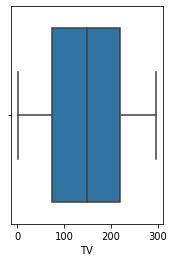

In [14]:
plt.subplot(122)
sns.boxplot(df["TV"])

C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radio'>

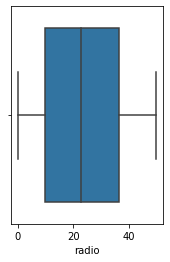

In [15]:
plt.subplot(122)
sns.boxplot(df["radio"])

C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newspaper'>

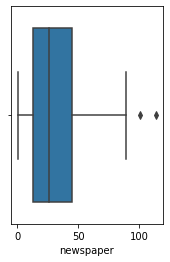

In [16]:
plt.subplot(122)
sns.boxplot(df["newspaper"])

C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

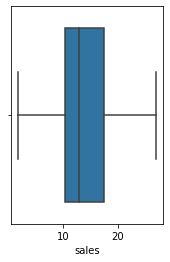

In [17]:
plt.subplot(122)
sns.boxplot(df["sales"])

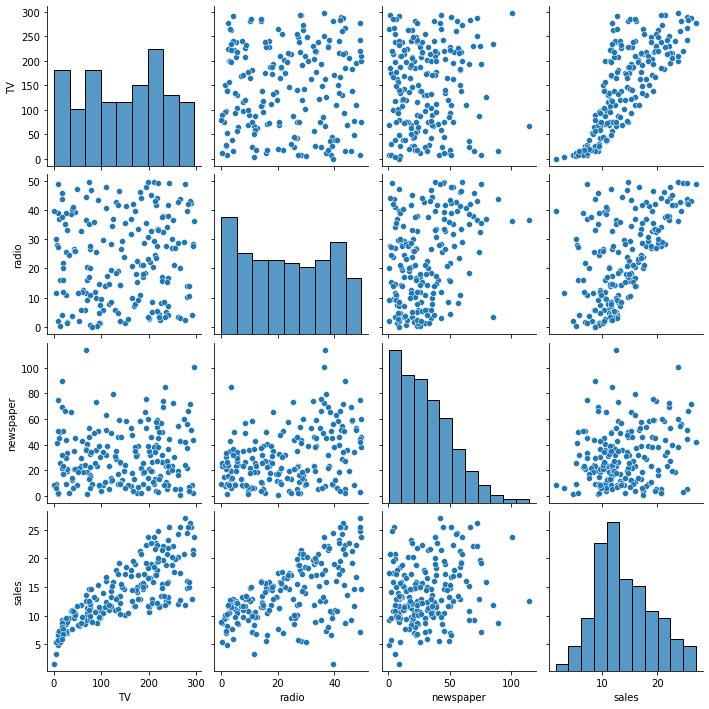

In [18]:
sns.pairplot(df)

***we can see sales and tv have positive correlation***

In [19]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [20]:
x=df[["TV"]]

In [21]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [22]:
y=df[["sales"]]

In [23]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


***we considering sales & tv data***

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
xtrain.shape

(150, 1)

In [27]:
xtest.shape

(50, 1)

In [28]:
ytrain.shape

(150, 1)

In [29]:
ytest.shape

(50, 1)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression(fit_intercept=True)

***linear regression parameters***

In [32]:
model.fit(xtrain,ytrain)

LinearRegression()

In [33]:
model.intercept_

array([7.24890928])

In [34]:
model.coef_

array([[0.04614341]])

In [35]:
yp=model.predict(xtest)
yp

array([[10.44203308],
       [ 9.55607966],
       [11.42027332],
       [20.61665445],
       [15.10251725],
       [ 9.84216879],
       [ 7.65035693],
       [18.32794143],
       [ 8.34712238],
       [16.36684661],
       [19.30618167],
       [11.27261442],
       [14.4749669 ],
       [15.91464122],
       [10.77426562],
       [12.79534687],
       [19.50459832],
       [ 7.28120967],
       [10.69582183],
       [17.09591245],
       [20.51975329],
       [13.72282936],
       [15.32861994],
       [13.32599606],
       [ 9.71758159],
       [12.92916275],
       [14.89025757],
       [16.70830783],
       [17.58503257],
       [ 8.40710881],
       [10.37743231],
       [16.42683304],
       [20.20136378],
       [18.40177088],
       [ 7.85800226],
       [ 8.111791  ],
       [ 9.99905637],
       [15.59163737],
       [10.40511836],
       [ 8.40249447],
       [ 8.95160102],
       [ 8.70242662],
       [13.84280222],
       [16.9205675 ],
       [17.18819927],
       [11

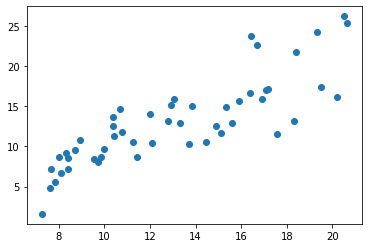

In [36]:
plt.scatter(yp,ytest)

C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 1080x360 with 0 Axes>

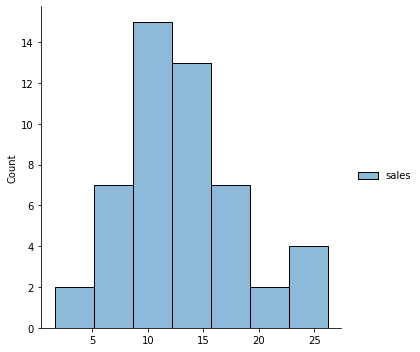

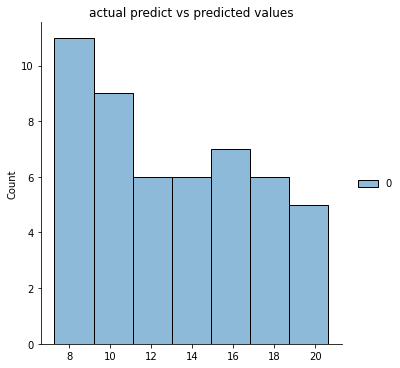

In [37]:
plt.figure(figsize=[15,5])
ax=sns.displot(ytest,color='r',label='actual values')
sns.displot(yp,color='b',label='predicted values',ax=ax)
plt.title('actual predict vs predicted values')
plt.show()

In [38]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error